# Текущие задачи

* Кластеризовать мемы 
* Кластеризовать юзеров
* Сопоставить юзерам мемы (кластеры)

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd
import numpy as np

In [30]:
path = 'drive/MyDrive/DS/meme'

In [31]:
event = pd.read_csv(path+'/tgbot_event.csv')
meme = pd.read_csv(path+'/tgbot_meme.csv')
user = pd.read_csv(path+'/tgbot_user.csv')

In [32]:
meme.head()

,meme_id,meme_type,original_post_link,source_name,published_at,telegram_file_id,content_url,caption,content_lang,is_available,likes,dislikes,created_at,updated_at,is_broken,source_id,content_text,caption_lang,language_id
0,13395,photo,https://vk.com/saintbeobanka?w=wall-67185996_2...,https://vk.com/saintbeobanka,2020-03-28 00:22:26+00,AgACAgQAAx0EVqG9GwACyDJefsuwVgIydYSqXSt9L2-o3Y...,https://sun6-14.userapi.com/c7004/v7004381/823...,NaN,ru,True,28,38,2020-03-28 03:59:44.496141+00,2021-02-10 07:21:58.272992+00,False,10.0,Будильник Отложить на 10 мимут vk.com/jaimes_h...,ww,2.0
1,13952,photo,https://reddit.com/r/wholesomememes/comments/f...,https://www.reddit.com/r/wholesomememes/,2020-03-28 12:14:46+00,AgACAgQAAx0EVqG9GwAC0QZef4L5HUrdey1K4xOBNC0V0-...,https://i.redd.it/xo8ilxurnep41.png,Wholesome slavery?,en,True,9,16,2020-03-28 17:01:45.289559+00,2021-02-10 07:21:58.276687+00,False,80.0,Happy Thanksgiving ! I was gonna say Let's say...,en,3.0
2,15593,photo,https://t.me/LaQeque/41396,https://t.me/LaQeque,2020-03-30 09:11:04+00,AgACAgIAAx0CVqG9GwAC7X5egk_f1FcUOOXdwvQ6tCUBOP...,https://storage.googleapis.com/meme_imgs/15593...,NaN,ru,True,41,54,2020-03-30 12:02:40.780487+00,2021-02-10 07:21:58.28043+00,False,19.0,"Ггграждане, мемння ззовут вваш преззидент, ппо...",ww,2.0
3,18442,photo,https://reddit.com/r/dankmemes/comments/ftalgn...,https://www.reddit.com/r/dankmemes/,2020-04-01 22:53:31+00,AgACAgQAAx0EVqG9GwABAQ8_XoVyYdS-2R9bcIpdH4YqK-...,https://i.redd.it/a3mp5spddaq41.jpg,You Won’t last 10 seconds,en,True,87,48,2020-04-02 05:04:33.300689+00,2021-02-10 07:21:58.28401+00,False,78.0,AL ALL WT Should we contact the hot milfs in o...,en,3.0
4,20798,photo,https://vk.com/wtf.rasha?w=wall-23486067_179559,https://vk.com/wtf.rasha,2020-04-04 11:15:01+00,AgACAgQAAx0EVqG9GwABATuvXonKXWZuSeRqN8vd8gVR09...,https://sun9-37.userapi.com/c858228/v858228646...,NaN,ru,True,234,178,2020-04-04 12:10:28.173755+00,2021-02-10 07:21:58.291519+00,False,9.0,Шляпа Патриарха Никона @NikonaShapka апрель 20...,ww,2.0


In [33]:
user.head()

,user_id,username,first_name,last_name,language_code,seed,deep_link,is_blocked_bot,is_banned,is_admin,is_moderator,sessions,last_session_memes,watched_memes,created_at,updated_at,interface_lang,gender,latest_meme_sent_at
0,1235209430,NaN,Paras,Kamboj,NaN,6,likemeupbot_lang_en,True,False,False,0,3,4,8,2020-10-27 07:33:12.040495+00,2021-02-10 00:29:57.669801+00,en,NaN,NaN
1,113584040,nikrnrr,N,NaN,ru,26,NaN,True,False,False,0,1,1,0,2020-10-28 12:05:37.473558+00,2021-02-10 01:29:57.505289+00,ru,N,NaN
2,1142713343,NaN,Serik,NaN,NaN,32,NaN,True,False,False,0,1,1,0,2020-10-27 17:31:30.480084+00,2021-02-10 01:29:55.555919+00,en,NaN,NaN
3,187967374,Ddivanov,Dmitry,Ivanov,ru,13,NaN,True,False,False,0,2,5,9,2020-10-26 13:12:52.373779+00,2021-02-09 23:29:56.086916+00,ru,M,NaN
4,923016092,NaN,Joanna,NaN,es,99,NaN,False,False,False,0,39,1,35,2020-10-27 19:11:33.959974+00,2021-02-09 17:56:04.574689+00,en,NaN,2021-02-09 17:56:04.574558+00


## Обработка meme_df

In [34]:
meme.columns

Index(['meme_id', 'meme_type', 'original_post_link', 'source_name',
       'published_at', 'telegram_file_id', 'content_url', 'caption',
       'content_lang', 'is_available', 'likes', 'dislikes', 'created_at',
       'updated_at', 'is_broken', 'source_id', 'content_text', 'caption_lang',
       'language_id'],
      dtype='object')

In [35]:
meme.isna().sum()

meme_id                   0
meme_type                 0
original_post_link     1103
source_name               0
published_at              0
telegram_file_id         29
content_url            8829
caption               53830
content_lang          14256
is_available              0
likes                     0
dislikes                  0
created_at                0
updated_at                0
is_broken                 0
source_id              2401
content_text          21805
caption_lang           4855
language_id            1770
dtype: int64

In [36]:
meme_columns_dropped = ['original_post_link', 'telegram_file_id', 'content_url', 'updated_at', 'is_broken', 'caption', 'caption_lang', 'created_at'] # столбцы в meme_df, которые не нужны для исследования
meme.drop(meme_columns_dropped, axis = 1, inplace= True)


In [37]:
meme.isna().sum()

meme_id             0
meme_type           0
source_name         0
published_at        0
content_lang    14256
is_available        0
likes               0
dislikes            0
source_id        2401
content_text    21805
language_id      1770
dtype: int64

In [38]:
meme.content_lang.value_counts()

en       33503
ru       25724
ww        7533
pt-PT     3543
und       1515
         ...  
bn           2
ur           2
bs           1
th           1
ta           1
Name: content_lang, Length: 93, dtype: int64

In [39]:
# преобразуем content_lang по следующей логике: для RU - 0, EN - 1, иной язык - 2
meme.content_lang.replace({'ru':0, 'en':1}, inplace = True)
meme.loc[(meme['content_lang'] != 0) & (meme['content_lang'] != 1), 'content_lang'] = 2

In [40]:
meme.isna().sum()

meme_id             0
meme_type           0
source_name         0
published_at        0
content_lang        0
is_available        0
likes               0
dislikes            0
source_id        2401
content_text    21805
language_id      1770
dtype: int64

In [41]:
# преобразуем content_text по следующей логике: если есть текст, то ставим 1, если нет - 0
meme['content_text'].fillna(0, inplace = True)
meme.loc[meme['content_text'] != 0, 'content_text'] = 1


In [42]:
meme.language_id.value_counts()

2.0    41728
3.0    36841
4.0     5151
1.0     3173
5.0      256
Name: language_id, dtype: int64

In [43]:
import random
nans = meme['language_id'].isna() # пропорциональное распределение языков по nan значениям
language_ids = meme.language_id.unique()
language_ids = language_ids[np.isnan(language_ids) == False]
length = sum(nans)
replacement = random.choices(language_ids, k=length)
meme.loc[nans,'language_id'] = replacement

In [44]:
meme.language_id.value_counts()

2.0    42061
3.0    37204
4.0     5482
1.0     3553
5.0      619
Name: language_id, dtype: int64

In [45]:
meme.isna().sum()

meme_id            0
meme_type          0
source_name        0
published_at       0
content_lang       0
is_available       0
likes              0
dislikes           0
source_id       2401
content_text       0
language_id        0
dtype: int64

In [46]:
meme['source_id'].fillna(0, inplace = True)

In [47]:
meme.head()

,meme_id,meme_type,source_name,published_at,content_lang,is_available,likes,dislikes,source_id,content_text,language_id
0,13395,photo,https://vk.com/saintbeobanka,2020-03-28 00:22:26+00,0,True,28,38,10.0,1,2.0
1,13952,photo,https://www.reddit.com/r/wholesomememes/,2020-03-28 12:14:46+00,1,True,9,16,80.0,1,3.0
2,15593,photo,https://t.me/LaQeque,2020-03-30 09:11:04+00,0,True,41,54,19.0,1,2.0
3,18442,photo,https://www.reddit.com/r/dankmemes/,2020-04-01 22:53:31+00,1,True,87,48,78.0,1,3.0
4,20798,photo,https://vk.com/wtf.rasha,2020-04-04 11:15:01+00,0,True,234,178,9.0,1,2.0


In [48]:
meme = pd.get_dummies(meme, columns = ['meme_type'])

In [49]:
meme

,meme_id,source_name,published_at,content_lang,is_available,likes,dislikes,source_id,content_text,language_id,meme_type_animation,meme_type_photo,meme_type_video
0,13395,https://vk.com/saintbeobanka,2020-03-28 00:22:26+00,0,True,28,38,10.0,1,2.0,0,1,0
1,13952,https://www.reddit.com/r/wholesomememes/,2020-03-28 12:14:46+00,1,True,9,16,80.0,1,3.0,0,1,0
2,15593,https://t.me/LaQeque,2020-03-30 09:11:04+00,0,True,41,54,19.0,1,2.0,0,1,0
3,18442,https://www.reddit.com/r/dankmemes/,2020-04-01 22:53:31+00,1,True,87,48,78.0,1,3.0,0,1,0
4,20798,https://vk.com/wtf.rasha,2020-04-04 11:15:01+00,0,True,234,178,9.0,1,2.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88914,50179,https://vk.com/socialburr,2020-07-12 12:14:20+00,0,True,662,624,46.0,1,2.0,0,1,0
88915,61616,https://t.me/leninstreet,2020-09-30 16:00:06+00,0,True,133,150,29.0,1,2.0,0,1,0
88916,22283,https://vk.com/eternalclassic,2020-04-05 16:40:00+00,1,False,5,11,4.0,1,3.0,0,1,0
88917,80056,https://t.me/low_content,2020-12-31 05:03:01+00,2,True,35,54,147.0,0,2.0,0,1,0


In [50]:
meme.source_name.str[8:13].value_counts()

t.me/    30063
vk.co    28664
www.r    20609
insta     9325
            89
         ...  
Hetma        1
r            1
_lila        1
ra           1
rg           1
Name: source_name, Length: 77, dtype: int64

In [51]:
# преобразование source_name. vk - 0, telegram - 1, reddit - 2, inst - 3.
meme['source_grouped'] = meme.source_name.str[8:13]
meme.source_grouped.replace({'vk.co':0, 't.me/':1, 'www.r':2, 'insta':3}, inplace = True)
meme.drop('source_name', axis = 1, inplace = True)
meme

,meme_id,published_at,content_lang,is_available,likes,dislikes,source_id,content_text,language_id,meme_type_animation,meme_type_photo,meme_type_video,source_grouped
0,13395,2020-03-28 00:22:26+00,0,True,28,38,10.0,1,2.0,0,1,0,0
1,13952,2020-03-28 12:14:46+00,1,True,9,16,80.0,1,3.0,0,1,0,2
2,15593,2020-03-30 09:11:04+00,0,True,41,54,19.0,1,2.0,0,1,0,1
3,18442,2020-04-01 22:53:31+00,1,True,87,48,78.0,1,3.0,0,1,0,2
4,20798,2020-04-04 11:15:01+00,0,True,234,178,9.0,1,2.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88914,50179,2020-07-12 12:14:20+00,0,True,662,624,46.0,1,2.0,0,1,0,0
88915,61616,2020-09-30 16:00:06+00,0,True,133,150,29.0,1,2.0,0,1,0,1
88916,22283,2020-04-05 16:40:00+00,1,False,5,11,4.0,1,3.0,0,1,0,0
88917,80056,2020-12-31 05:03:01+00,2,True,35,54,147.0,0,2.0,0,1,0,1


In [52]:
meme['is_available'] = meme['is_available'].astype(int)
meme

,meme_id,published_at,content_lang,is_available,likes,dislikes,source_id,content_text,language_id,meme_type_animation,meme_type_photo,meme_type_video,source_grouped
0,13395,2020-03-28 00:22:26+00,0,1,28,38,10.0,1,2.0,0,1,0,0
1,13952,2020-03-28 12:14:46+00,1,1,9,16,80.0,1,3.0,0,1,0,2
2,15593,2020-03-30 09:11:04+00,0,1,41,54,19.0,1,2.0,0,1,0,1
3,18442,2020-04-01 22:53:31+00,1,1,87,48,78.0,1,3.0,0,1,0,2
4,20798,2020-04-04 11:15:01+00,0,1,234,178,9.0,1,2.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88914,50179,2020-07-12 12:14:20+00,0,1,662,624,46.0,1,2.0,0,1,0,0
88915,61616,2020-09-30 16:00:06+00,0,1,133,150,29.0,1,2.0,0,1,0,1
88916,22283,2020-04-05 16:40:00+00,1,0,5,11,4.0,1,3.0,0,1,0,0
88917,80056,2020-12-31 05:03:01+00,2,1,35,54,147.0,0,2.0,0,1,0,1


In [57]:
meme['published_at'] = meme['published_at'].str[0:4].astype(int)
meme['published_at'].value_counts()

In [62]:
#преобразуем published_at по логике: если мем опубликован в 2021 году - 1, в ином случае - 0
meme.published_at.replace({2021:1}, inplace = True)
meme.loc[meme['published_at'] != 1, 'published_at'] = 0
meme['published_at'].value_counts()
meme.rename(columns = {'published_at' : 'published_at2021'}, inplace = True)

In [66]:
meme.set_index('meme_id', inplace = True)

In [67]:
import seaborn as sns

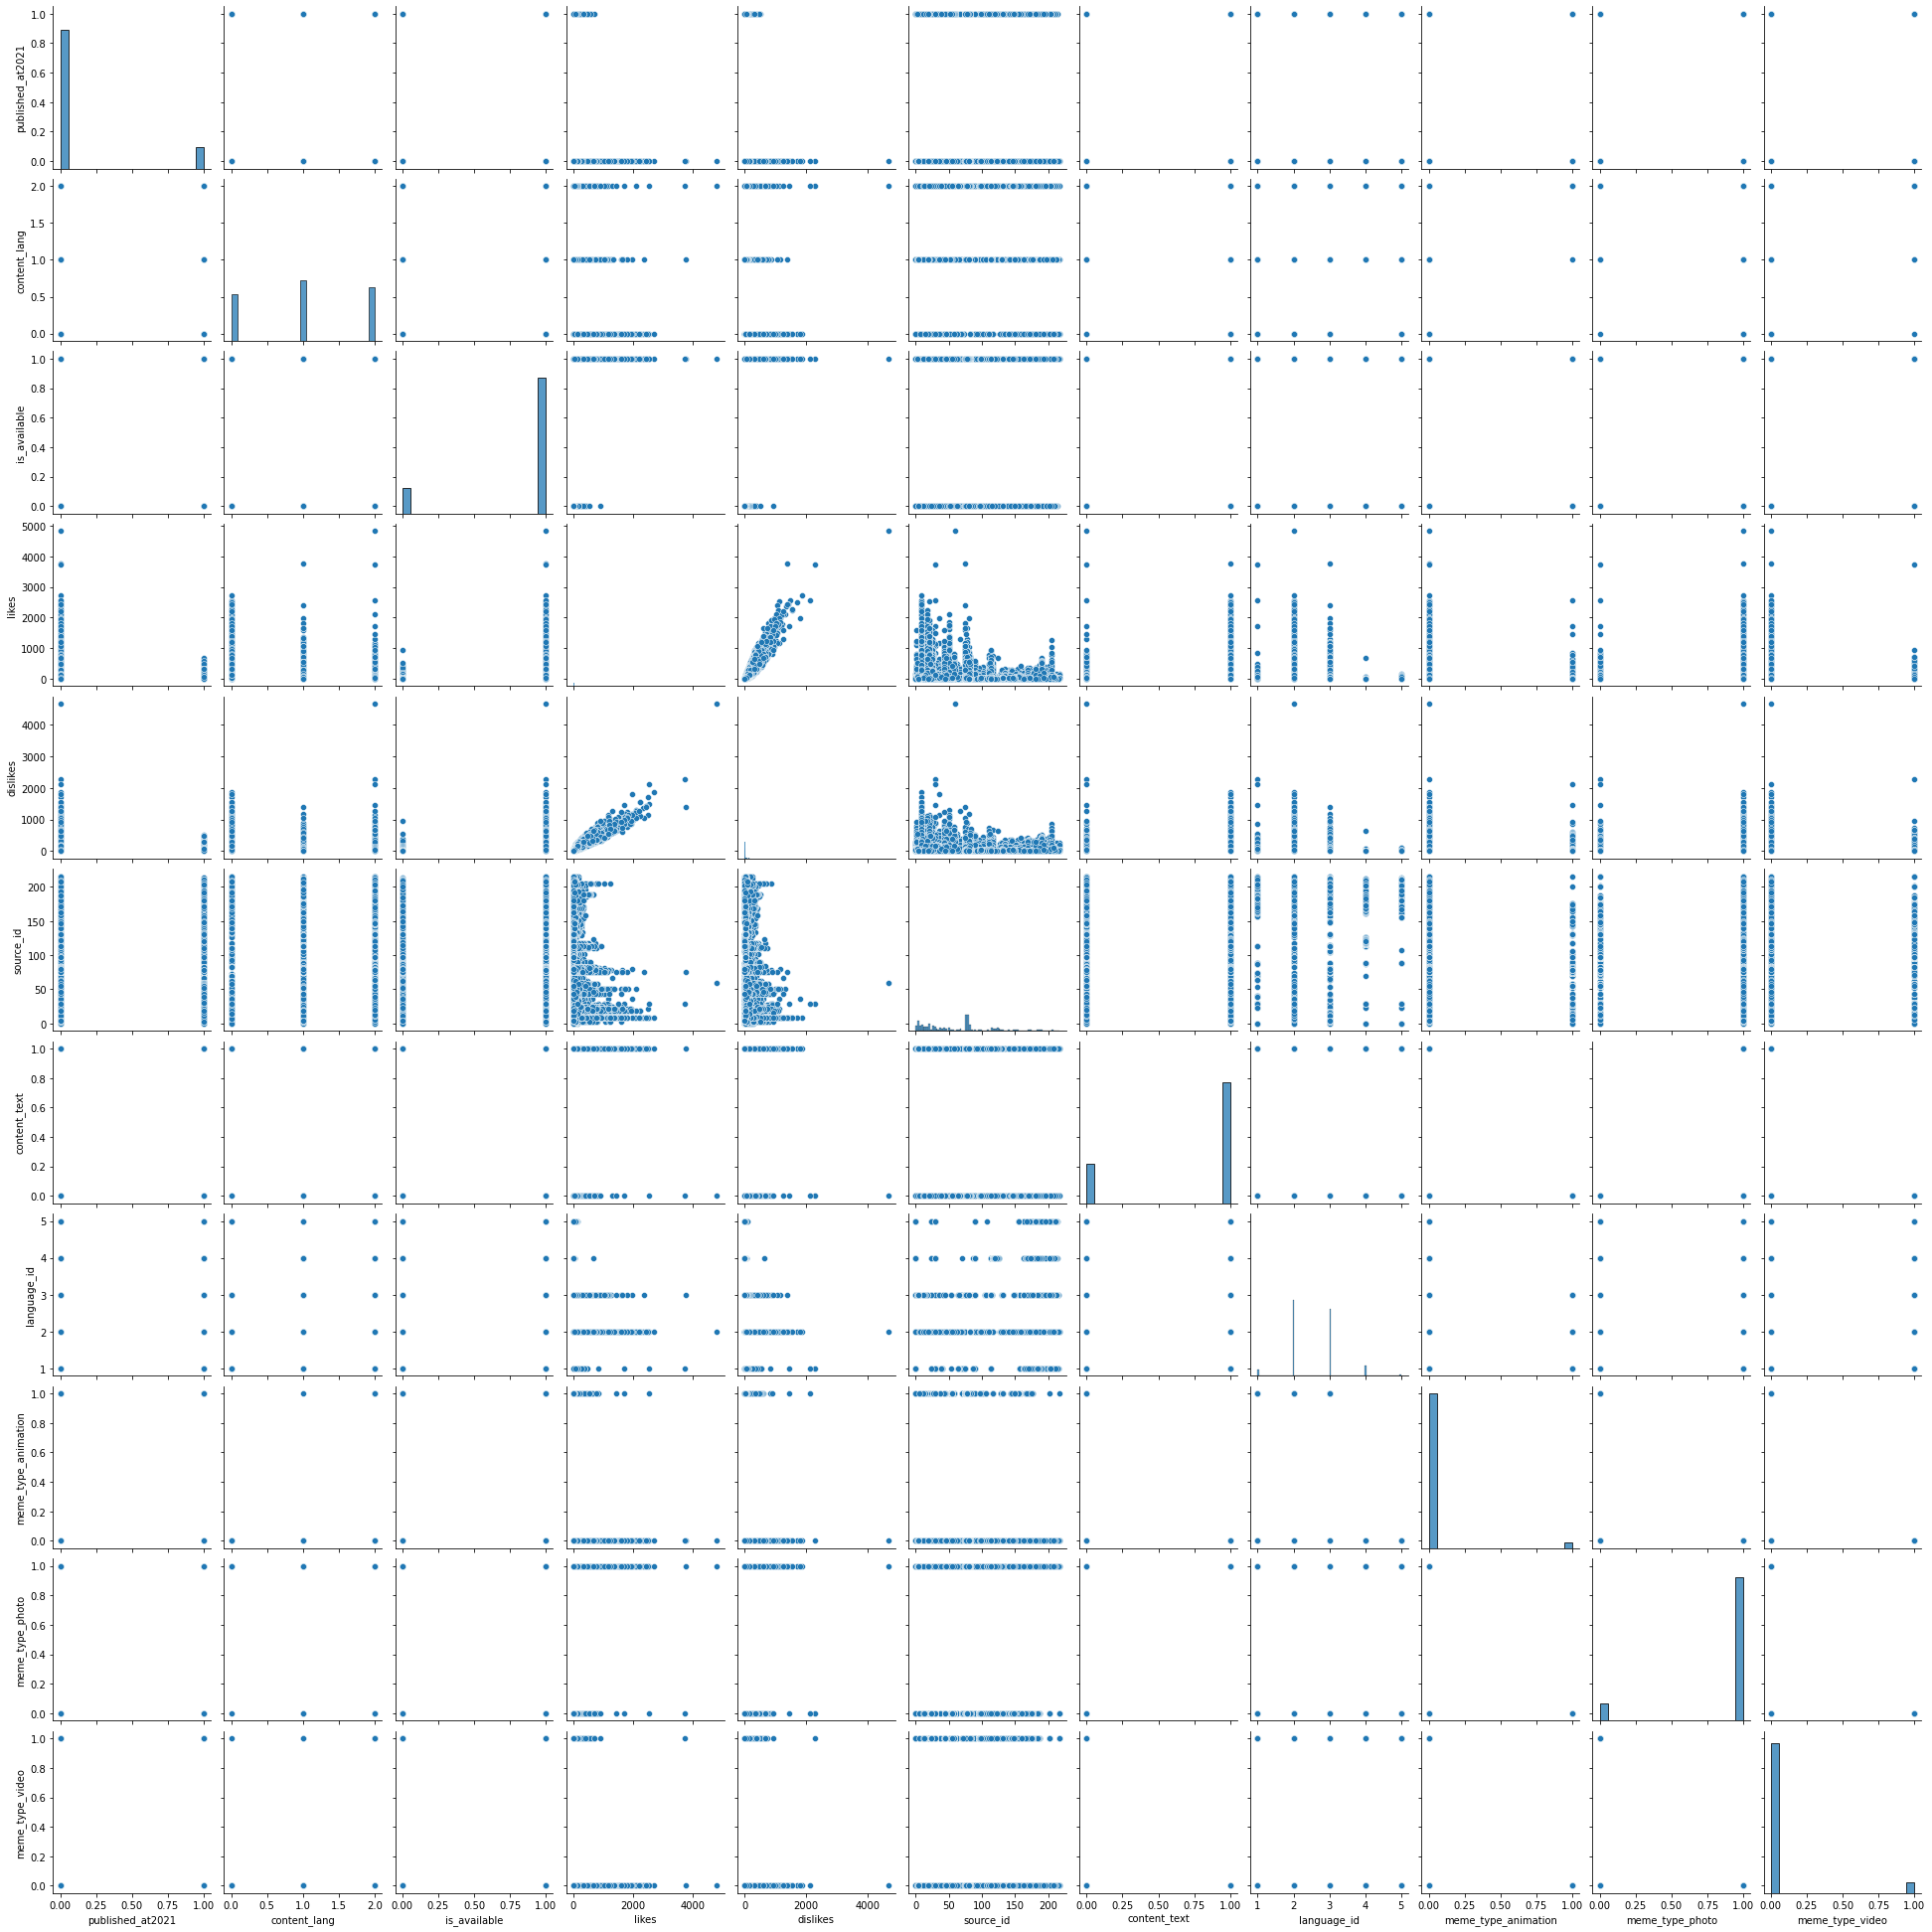

In [68]:
sns.pairplot(meme)